In [34]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
df = pd.read_csv('C:/Users/User/Desktop/Arquivos CSV/VisualizacaoYT.csv')
df.head()

,canal,url_canal,nome_video,url_video,data_visualizacao,part_of_day,year,month,day,day_name
0,ge,https://www.youtube.com/channel/UCgCKagVhzGnZc...,CHAPECOENSE 2 X 3 CUIABÁ | MELHORES MOMENTOS |...,https://www.youtube.com/watch?v=1QGYM5n6M6o,2021-07-18 15:29:30,Noon,2021,July,18,Sunday
1,ESPN Brasil,https://www.youtube.com/channel/UCw5-xj3AKqEiz...,"MICHAEL FAZ GOLAÇO, DIEGO ALVES BRILHA, E FLAM...",https://www.youtube.com/watch?v=6uojvTvjhpI,2021-07-18 13:59:52,Noon,2021,July,18,Sunday
2,Flow Podcast,https://www.youtube.com/channel/UC4ncvgh5hFr5O...,KID BENGALA [+ EMME WHITE] - Flow Fodcast #413...,https://www.youtube.com/watch?v=OkFRJBA0iNo,2021-07-18 11:34:32,Morning,2021,July,18,Sunday
3,"Nem, Amigos Podcast",https://www.youtube.com/channel/UCzSYennmIHNpi...,#06 - REENCONTRO IGÃO E CARTOLOUCO (PODPAH) -...,https://www.youtube.com/watch?v=wsvuMNJA32k,2021-07-18 11:31:00,Morning,2021,July,18,Sunday
4,Cartoloucos,https://www.youtube.com/channel/UCfBw30ryGwSC-...,COCIELO: “YOUTUBER É TUDO INVEJOSO” - 100 PERG...,https://www.youtube.com/watch?v=u_WPKk-rPZ0,2021-07-18 11:30:55,Morning,2021,July,18,Sunday


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   canal              4735 non-null   object
 1   url_canal          4735 non-null   object
 2   nome_video         4735 non-null   object
 3   url_video          4735 non-null   object
 4   data_visualizacao  4735 non-null   object
 5   part_of_day        4735 non-null   object
 6   year               4735 non-null   int64 
 7   month              4735 non-null   object
 8   day                4735 non-null   int64 
 9   day_name           4735 non-null   object
dtypes: int64(2), object(8)
memory usage: 370.0+ KB


In [37]:
df = df.drop(columns=['url_canal', 'url_video'])
df.head()

,canal,nome_video,data_visualizacao,part_of_day,year,month,day,day_name
0,ge,CHAPECOENSE 2 X 3 CUIABÁ | MELHORES MOMENTOS |...,2021-07-18 15:29:30,Noon,2021,July,18,Sunday
1,ESPN Brasil,"MICHAEL FAZ GOLAÇO, DIEGO ALVES BRILHA, E FLAM...",2021-07-18 13:59:52,Noon,2021,July,18,Sunday
2,Flow Podcast,KID BENGALA [+ EMME WHITE] - Flow Fodcast #413...,2021-07-18 11:34:32,Morning,2021,July,18,Sunday
3,"Nem, Amigos Podcast",#06 - REENCONTRO IGÃO E CARTOLOUCO (PODPAH) -...,2021-07-18 11:31:00,Morning,2021,July,18,Sunday
4,Cartoloucos,COCIELO: “YOUTUBER É TUDO INVEJOSO” - 100 PERG...,2021-07-18 11:30:55,Morning,2021,July,18,Sunday


In [38]:
df['data_visualizacao'] = pd.to_datetime(df['data_visualizacao'])

# Criando as colunas Ano,Mês, dia e dia da semana
df['Ano'], df['Mês'] = df['data_visualizacao'].dt.year, df['data_visualizacao'].dt.month_name()
df['Dia'] = df['data_visualizacao'].dt.day
df['hour'] = df['data_visualizacao'].dt.hour
df['Dia da Semana'] = df['data_visualizacao'].dt.day_name()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   canal              4735 non-null   object        
 1   nome_video         4735 non-null   object        
 2   data_visualizacao  4735 non-null   datetime64[ns]
 3   part_of_day        4735 non-null   object        
 4   year               4735 non-null   int64         
 5   month              4735 non-null   object        
 6   day                4735 non-null   int64         
 7   day_name           4735 non-null   object        
 8   Ano                4735 non-null   int64         
 9   Mês                4735 non-null   object        
 10  Dia                4735 non-null   int64         
 11  hour               4735 non-null   int64         
 12  Dia da Semana      4735 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 481.0+ 

In [40]:
df['hour'] = pd.to_datetime(df['hour'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   canal              4735 non-null   object        
 1   nome_video         4735 non-null   object        
 2   data_visualizacao  4735 non-null   datetime64[ns]
 3   part_of_day        4735 non-null   object        
 4   year               4735 non-null   int64         
 5   month              4735 non-null   object        
 6   day                4735 non-null   int64         
 7   day_name           4735 non-null   object        
 8   Ano                4735 non-null   int64         
 9   Mês                4735 non-null   object        
 10  Dia                4735 non-null   int64         
 11  hour               4735 non-null   datetime64[ns]
 12  Dia da Semana      4735 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 481.0+ 

In [42]:
def Parte_do_dia(x):
    if (x >= 6) and (x < 12):
        return 'Manhã'
    elif (x >= 12) and (x < 18):
        return 'Tarde'
    elif (x > 18) and (x < 23):
        return 'Noite'
    else:
        return 'Madrugada'

df['Parte do dia'] = df['data_visualizacao'].dt.hour.apply(Parte_do_dia)

In [43]:
df.head(1)

,canal,nome_video,data_visualizacao,part_of_day,year,month,day,day_name,Ano,Mês,Dia,hour,Dia da Semana,Parte do dia
0,ge,CHAPECOENSE 2 X 3 CUIABÁ | MELHORES MOMENTOS |...,2021-07-18 15:29:30,Noon,2021,July,18,Sunday,2021,July,18,1970-01-01 00:00:00.000000015,Sunday,Tarde


In [44]:
df = df.drop(columns=['part_of_day', 'year', 'month','day','day_name','hour'])

In [45]:
df.head(1)

,canal,nome_video,data_visualizacao,Ano,Mês,Dia,Dia da Semana,Parte do dia
0,ge,CHAPECOENSE 2 X 3 CUIABÁ | MELHORES MOMENTOS |...,2021-07-18 15:29:30,2021,July,18,Sunday,Tarde


In [46]:
df['hora'] = df['data_visualizacao'].dt.hour

In [47]:
df.head(1)

,canal,nome_video,data_visualizacao,Ano,Mês,Dia,Dia da Semana,Parte do dia,hora
0,ge,CHAPECOENSE 2 X 3 CUIABÁ | MELHORES MOMENTOS |...,2021-07-18 15:29:30,2021,July,18,Sunday,Tarde,15


In [48]:
df['Dia da Semana'] = df['Dia da Semana'].map({'Monday':'Segunda-feira',
                             'Tuesday':'Terça-feira',
                             'Wednesday':'Quarta-feira',
                             'Thursday' : 'Quinta-feira',
                             'Friday' : 'Sexta-feira',
                             'Saturday' : 'Sábado',               
                             'Sunday' : 'Domingo',            
                             np.nan:'NY'},
                             na_action=None)

In [49]:
df['Mês'] = df['Mês'].map({'January':'Janeiro',
                             'February':'Fevereiro',
                             'March':'Março',
                             'April' : 'Abril',
                             'May' : 'Maio',
                             'June' : 'Junho',               
                             'July' : 'Julho', 
                             'August' : 'Agosto',          
                             'September' : 'Setembro',
                             'October' : 'Outubro',
                             'November' : 'Novembro',                
                             'December' : 'Dezembro',                 
                             np.nan:'NY'},
                             na_action=None)

In [50]:
df['Mês'].value_counts()

Junho        942
Abril        667
Maio         646
Março        569
Julho        481
Agosto       362
Fevereiro    278
Setembro     205
Dezembro     194
Outubro      164
Novembro     144
Janeiro       83
Name: Mês, dtype: int64

In [51]:
df['Dia da Semana'].value_counts()

Quarta-feira     832
Sexta-feira      748
Segunda-feira    708
Quinta-feira     679
Sábado           612
Terça-feira      604
Domingo          552
Name: Dia da Semana, dtype: int64

In [52]:
df.head()

,canal,nome_video,data_visualizacao,Ano,Mês,Dia,Dia da Semana,Parte do dia,hora
0,ge,CHAPECOENSE 2 X 3 CUIABÁ | MELHORES MOMENTOS |...,2021-07-18 15:29:30,2021,Julho,18,Domingo,Tarde,15
1,ESPN Brasil,"MICHAEL FAZ GOLAÇO, DIEGO ALVES BRILHA, E FLAM...",2021-07-18 13:59:52,2021,Julho,18,Domingo,Tarde,13
2,Flow Podcast,KID BENGALA [+ EMME WHITE] - Flow Fodcast #413...,2021-07-18 11:34:32,2021,Julho,18,Domingo,Manhã,11
3,"Nem, Amigos Podcast",#06 - REENCONTRO IGÃO E CARTOLOUCO (PODPAH) -...,2021-07-18 11:31:00,2021,Julho,18,Domingo,Manhã,11
4,Cartoloucos,COCIELO: “YOUTUBER É TUDO INVEJOSO” - 100 PERG...,2021-07-18 11:30:55,2021,Julho,18,Domingo,Manhã,11


In [53]:
df['Ano'].value_counts()

2020    2380
2021    2355
Name: Ano, dtype: int64

<AxesSubplot:>

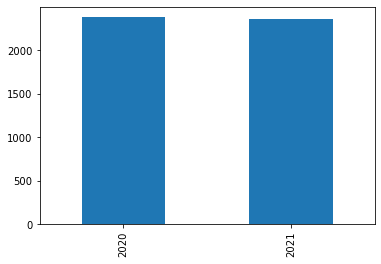

In [54]:
df['Ano'].value_counts().plot.bar()

In [55]:
df['Dia'].value_counts()

25    287
12    243
27    239
30    214
9     211
22    194
26    191
18    186
29    180
19    175
4     171
13    163
3     156
6     152
2     150
11    141
14    140
1     133
7     132
15    132
23    132
24    124
21    117
10    117
16    110
20    102
31     99
28     96
5      87
8      82
17     79
Name: Dia, dtype: int64

<AxesSubplot:>

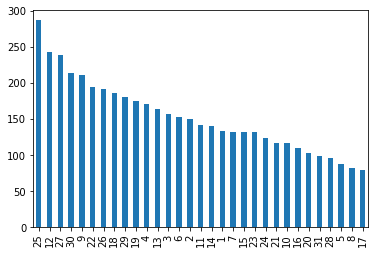

In [56]:
df['Dia'].value_counts().plot.bar()

In [57]:
df['Dia da Semana'].value_counts()

Quarta-feira     832
Sexta-feira      748
Segunda-feira    708
Quinta-feira     679
Sábado           612
Terça-feira      604
Domingo          552
Name: Dia da Semana, dtype: int64

<AxesSubplot:>

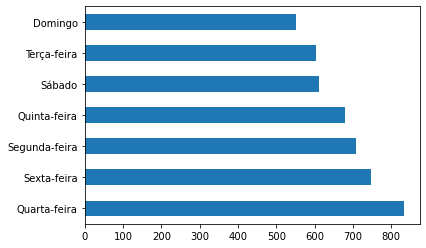

In [58]:
df['Dia da Semana'].value_counts().plot.barh()

In [59]:
df['Parte do dia'].value_counts()

Tarde        1520
Madrugada    1476
Noite        1404
Manhã         335
Name: Parte do dia, dtype: int64

<AxesSubplot:>

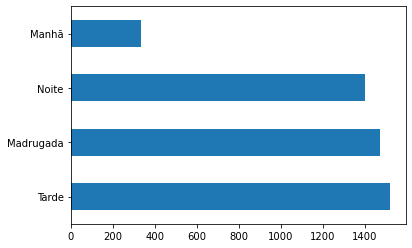

In [60]:
df['Parte do dia'].value_counts().plot.barh()

In [61]:
df['hora'].value_counts()

21    509
0     495
12    426
20    332
23    318
22    314
1     274
13    267
19    249
18    246
16    234
17    230
14    191
15    172
10    136
11    136
2      99
3      37
9      34
8      22
4       7
7       5
6       2
Name: hora, dtype: int64

<AxesSubplot:>

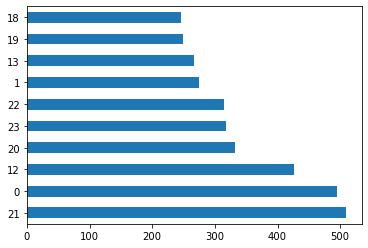

In [62]:
df['hora'].value_counts().head(10).plot.barh()

In [63]:
df['canal'].value_counts().head(10)

Julia MineGirl          64
Curso em Vídeo          53
Vintage Culture         51
Desimpedidos            41
Everson Zoio            36
NOW UNITED              31
BLACKPINK               31
Canal 90                30
Gabriel Monteiro        27
Programação Dinâmica    27
Name: canal, dtype: int64

<AxesSubplot:>

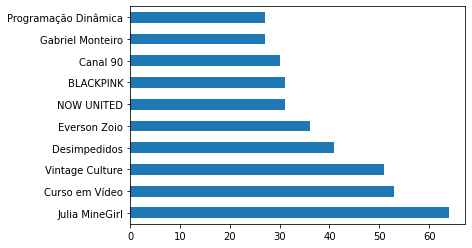

In [64]:
df['canal'].value_counts().head(10).plot.barh()

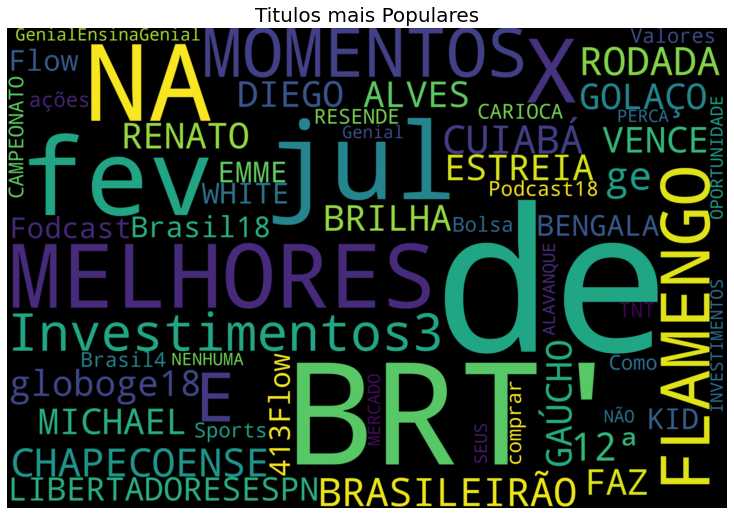

In [65]:
#nuvem de palavras dos vídeos
text = df['nome_video'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Titulos mais Populares', fontsize=20)
plt.show()

In [67]:
df.to_csv('APRESENTAÇÃO IFOOD/dados_YT.csv', index=False)